In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv(r"food_coded.csv")


In [5]:
features = data[['cook','eating_out','employment','ethnic_food','exercise','fav_cuisine_coded','fruit_day','income','on_off_campus','sports','pay_meal_out','veggies_day']]
features.head()

,cook,eating_out,employment,ethnic_food,exercise,fav_cuisine_coded,fruit_day,income,on_off_campus,sports,pay_meal_out,veggies_day
0,2.0,3,3.0,1,1.0,3,5,5.0,1.0,1.0,2,5
1,3.0,2,2.0,4,1.0,1,4,4.0,1.0,1.0,4,4
2,1.0,2,3.0,5,2.0,1,5,6.0,2.0,2.0,3,5
3,2.0,2,3.0,5,3.0,3,4,6.0,1.0,2.0,2,3
4,1.0,2,2.0,4,1.0,1,4,6.0,1.0,1.0,4,4


# CLEANING THE DATASET

In [6]:
#checking whether there are any duplicates
duplicates = features[features.duplicated()]
duplicates
#from the output, it is clear that there are no duplicate rows

,cook,eating_out,employment,ethnic_food,exercise,fav_cuisine_coded,fruit_day,income,on_off_campus,sports,pay_meal_out,veggies_day


In [7]:
#checking for null and missing values
#notnull method returns a dataframe of boolean values
#True --> No null values. False --> null values are there
check_na = features.dropna(axis=0, how='any')
print('There are' ,(len(features) - len(check_na)), 'rows with atleast one column value having a null value.')

There are 25 rows with atleast one column value having a null value.


In [8]:
#Let us remove thAe null values from the original dataset
features.dropna(axis=0, how='any', inplace=True)
len(features)

C:\Users\RAVI\AppData\Local\Temp\ipykernel_19360\3150841916.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.dropna(axis=0, how='any', inplace=True)


100

# VISUALIZING THE DATASET

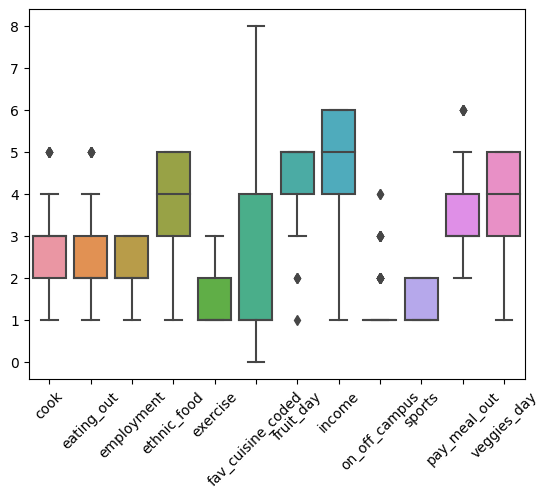

In [9]:
#plotting the dataset in the form of a boxplot
ax=sns.boxplot(data=features)
ax.set_xticklabels(features,rotation=45)
plt.show()

# BUILDING THE KMEANS MODEL FOR THE CODEBOOK DATASET

In [10]:
from sklearn.cluster import KMeans

C:\Users\RAVI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\RAVI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\RAVI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\RAVI

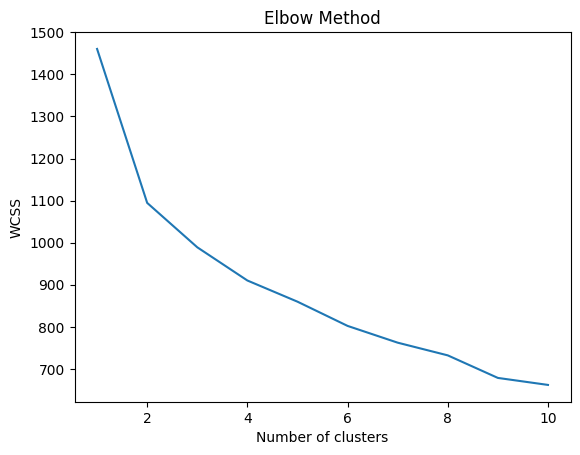

In [11]:
wcss = []
for i in range(1,11):
    Classifier = KMeans(n_clusters=i)
    Classifier.fit(features)
    wcss.append(Classifier.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# From the Graph, it seems K=8 might be optimal

In [12]:
Classifier = KMeans(n_clusters=6).fit(features)
y_pred = Classifier.fit_predict(features)

C:\Users\RAVI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\RAVI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


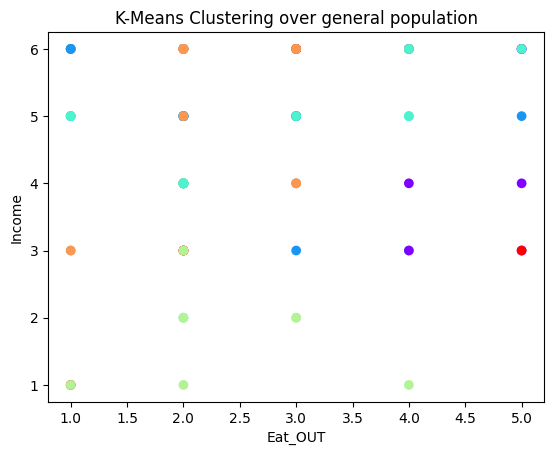

In [13]:
plt.scatter(features['eating_out'], features['income'], c=y_pred, cmap='rainbow')
plt.title('K-Means Clustering over general population')
plt.ylabel('Income')
plt.xlabel('Eat_OUT')
plt.show()

In [14]:
import json  
import pandas as pd  
from pandas.io.json import json_normalize  
import requests
from tabulate import tabulate
from sklearn.cluster import KMeans
import random
import numpy as np
import pandas as pd
import folium
import warnings
warnings.filterwarnings('ignore')
import os
os.environ.keys()

KeysView(environ({'ACSETUPSVCPORT': '23210', 'ACSVCPORT': '17532', 'ALLUSERSPROFILE': 'C:\\ProgramData', 'APPDATA': 'C:\\Users\\RAVI\\AppData\\Roaming', 'APPLICATION_INSIGHTS_NO_DIAGNOSTIC_CHANNEL': '1', 'CHROME_CRASHPAD_PIPE_NAME': '\\\\.\\pipe\\LOCAL\\crashpad_3584_IRUSZGIYATXAAGFO', 'COMMONPROGRAMFILES': 'C:\\Program Files\\Common Files', 'COMMONPROGRAMFILES(X86)': 'C:\\Program Files (x86)\\Common Files', 'COMMONPROGRAMW6432': 'C:\\Program Files\\Common Files', 'COMPUTERNAME': 'RAVI01', 'COMSPEC': 'C:\\WINDOWS\\system32\\cmd.exe', 'DRIVERDATA': 'C:\\Windows\\System32\\Drivers\\DriverData', 'ELECTRON_RUN_AS_NODE': '1', 'HOMEDRIVE': 'C:', 'HOMEPATH': '\\Users\\RAVI', 'JPY_INTERRUPT_EVENT': '3144', 'LOCALAPPDATA': 'C:\\Users\\RAVI\\AppData\\Local', 'LOGONSERVER': '\\\\RAVI01', 'NUMBER_OF_PROCESSORS': '8', 'ONEDRIVE': 'C:\\Users\\RAVI\\OneDrive', 'ORIGINAL_XDG_CURRENT_DESKTOP': 'undefined', 'OS': 'Windows_NT', 'PATH': 'c:\\Users\\RAVI\\AppData\\Local\\Microsoft\\WindowsApps;c:\\Users\\R

In [15]:

url = 'https://discover.search.hereapi.com/v1/discover?in=circle:17.320486,76.839752;r=10000&q=library&apiKey=uJHMEjeagmFGldXp661-pDMf4R-PxvWIu7I68UjYC5Q'
data = requests.get(url).json()
d=json_normalize(data['items'])
d.to_csv('api-data/Library.csv')
d 

,title,id,language,ontologyId,resultType,access,distance,categories,address.label,address.countryCode,...,address.county,address.city,address.district,address.postalCode,position.lat,position.lng,address.subdistrict,references,address.street,contacts
0,Chalukya Study Centre,here:pds:place:356tends-1c9c06fecedb35054ca9e9...,en,here:cm:ontology:library,place,"[{'lat': 17.32398, 'lng': 76.83113}]",995,"[{'id': '800-8300-0175', 'name': 'Library', 'p...","Chalukya Study Centre, Bramhapura, Kalaburagi ...",IND,...,Kalaburagi,Kalaburagi,Bramhapura,585103,17.32410,76.83117,NaN,NaN,NaN,NaN
1,Mahatma Jyotiba Phule Library,here:pds:place:356tends-25e9327b130afb0287febc...,en,here:cm:ontology:library,place,"[{'lat': 17.32996, 'lng': 76.84083}]",1059,"[{'id': '800-8300-0175', 'name': 'Library', 'p...","Mahatma Jyotiba Phule Library, Sunder Nagar, A...",IND,...,Kalaburagi,Kalaburagi,Adarsh Nagar,585105,17.32997,76.84069,Sunder Nagar,NaN,NaN,NaN
2,Marathi Paper Press Library,here:pds:place:356tendk-9f607bc46f6f4cc6be9072...,en-GB,here:cm:ontology:library,place,"[{'lat': 17.31865, 'lng': 76.82771}]",1296,"[{'id': '800-8300-0175', 'name': 'Library', 'p...","Marathi Paper Press Library, P D A College Roa...",IND,...,Kalaburagi,Kalaburagi,Shambhognlli,585106,17.31864,76.82770,NaN,"[{'supplier': {'id': 'core'}, 'id': '105910313...",P D A College Road,NaN
3,Government Library,here:pds:place:356tendk-c98757646779482591fe12...,en,here:cm:ontology:library,place,"[{'lat': 17.31327, 'lng': 76.82967}]",1344,"[{'id': '800-8300-0175', 'name': 'Library', 'p...","Government Library, Panch Seela Naagr, Tarfile...",IND,...,Kalaburagi,Kalaburagi,Tarfile,585102,17.31335,76.82954,Panch Seela Naagr,NaN,NaN,NaN
4,Gurbarga Library,here:pds:place:356tendk-1774d7e0ca674a80b1a539...,en-GB,here:cm:ontology:library,place,"[{'lat': 17.31345, 'lng': 76.82917}]",1384,"[{'id': '800-8300-0175', 'name': 'Library', 'p...","Gurbarga Library, Panch Seela Naagr, Tarfile, ...",IND,...,Kalaburagi,Kalaburagi,Tarfile,585102,17.31344,76.82901,Panch Seela Naagr,"[{'supplier': {'id': 'core'}, 'id': '105910317...",NaN,NaN
5,Library,here:pds:place:356tends-8e0541945fb8461da2f99f...,en,here:cm:ontology:library,place,"[{'lat': 17.3214, 'lng': 76.85346}]",1418,"[{'id': '800-8300-0175', 'name': 'Library', 'p...","Library, Service Road, Rajapur, Kalaburagi 585...",IND,...,Kalaburagi,Kalaburagi,Rajapur,585106,17.32157,76.85306,NaN,NaN,Service Road,NaN
6,Tapassu Study Centre,here:pds:place:356tends-b4621312006a986856b49d...,en,here:cm:ontology:library,place,"[{'lat': 17.329, 'lng': 76.82693}]",1666,"[{'id': '800-8300-0175', 'name': 'Library', 'p...","Tapassu Study Centre, S B College Road, Anand ...",IND,...,Kalaburagi,Kalaburagi,Bramhapura,585103,17.32914,76.82694,Anand Nagar,NaN,S B College Road,[{'phone': [{'value': '+917760362143'}]}]
7,Government Library,here:pds:place:356tends-35d2c3c7a08de956b4fc40...,en,here:cm:ontology:library,place,"[{'lat': 17.33813, 'lng': 76.85231}]",2376,"[{'id': '800-8300-0175', 'name': 'Library', 'p...","Government Library, Santraswadi, Khaja Colony,...",IND,...,Kalaburagi,Kalaburagi,Khaja Colony,585105,17.33809,76.85244,Santraswadi,NaN,NaN,NaN
8,Gagaran Public Library,here:pds:place:356jx7ps-3c396dbdb08800aa4e5a10...,en-GB,here:cm:ontology:library,place,"[{'lat': 17.33922, 'lng': 76.82877}]",2384,"[{'id': '800-8300-0175', 'name': 'Library', 'p...","Gagaran Public Library, Janata Layout, Bramhap...",IND,...,Kalaburagi,Kalaburagi,Bramhapura,585101,17.33924,76.82886,Janata Layout,"[{'supplier': {'id': 'core'}, 'id': '105910440...",NaN,NaN
9,Maulana Abul Kalam Azad,here:pds:place:356jx7ps-16d1ae6e327e0657b01fe8...,en-GB,here:cm:ontology:library,place,"[{'lat': 17.34121, 'lng': 76.84532}]",2390,"[{'id': '800-8300-0175', 'name': 'Library', 'p...","Maulana Abul Kalam Azad, Darga Road, Santraswa...",IND,...,Kalaburagi,Kalaburagi,Khaja Colony,585104,17.34128,76.84547,Santraswadi,"[{'supplier': {'id': 'core'}, 'id': '113612809...",Darga Road,[{'phone': [{'value': '+919342

In [16]:
d.columns

Index(['title', 'id', 'language', 'ontologyId', 'resultType', 'access',
       'distance', 'categories', 'address.label', 'address.countryCode',
       'address.countryName', 'address.stateCode', 'address.state',
       'address.county', 'address.city', 'address.district',
       'address.postalCode', 'position.lat', 'position.lng',
       'address.subdistrict', 'references', 'address.street', 'contacts'],
      dtype='object')

In [17]:
#Cleaning API data
d2=d[['title','address.label','distance','access','position.lat','position.lng','address.postalCode','contacts','id']]
d2.to_csv('api-data/cleaned_apartment.csv')
d2

,title,address.label,distance,access,position.lat,position.lng,address.postalCode,contacts,id
0,Chalukya Study Centre,"Chalukya Study Centre, Bramhapura, Kalaburagi ...",995,"[{'lat': 17.32398, 'lng': 76.83113}]",17.32410,76.83117,585103,NaN,here:pds:place:356tends-1c9c06fecedb35054ca9e9...
1,Mahatma Jyotiba Phule Library,"Mahatma Jyotiba Phule Library, Sunder Nagar, A...",1059,"[{'lat': 17.32996, 'lng': 76.84083}]",17.32997,76.84069,585105,NaN,here:pds:place:356tends-25e9327b130afb0287febc...
2,Marathi Paper Press Library,"Marathi Paper Press Library, P D A College Roa...",1296,"[{'lat': 17.31865, 'lng': 76.82771}]",17.31864,76.82770,585106,NaN,here:pds:place:356tendk-9f607bc46f6f4cc6be9072...
3,Government Library,"Government Library, Panch Seela Naagr, Tarfile...",1344,"[{'lat': 17.31327, 'lng': 76.82967}]",17.31335,76.82954,585102,NaN,here:pds:place:356tendk-c98757646779482591fe12...
4,Gurbarga Library,"Gurbarga Library, Panch Seela Naagr, Tarfile, ...",1384,"[{'lat': 17.31345, 'lng': 76.82917}]",17.31344,76.82901,585102,NaN,here:pds:place:356tendk-1774d7e0ca674a80b1a539...
5,Library,"Library, Service Road, Rajapur, Kalaburagi 585...",1418,"[{'lat': 17.3214, 'lng': 76.85346}]",17.32157,76.85306,585106,NaN,here:pds:place:356tends-8e0541945fb8461da2f99f...
6,Tapassu Study Centre,"Tapassu Study Centre, S B College Road, Anand ...",1666,"[{'lat': 17.329, 'lng': 76.82693}]",17.32914,76.82694,585103,[{'phone': [{'value': '+917760362143'}]}],here:pds:place:356tends-b4621312006a986856b49d...
7,Government Library,"Government Library, Santraswadi, Khaja Colony,...",2376,"[{'lat': 17.33813, 'lng': 76.85231}]",17.33809,76.85244,585105,NaN,here:pds:place:356tends-35d2c3c7a08de956b4fc40...
8,Gagaran Public Library,"Gagaran Public Library, Janata Layout, Bramhap...",2384,"[{'lat': 17.33922, 'lng': 76.82877}]",17.33924,76.82886,585101,NaN,here:pds:place:356jx7ps-3c396dbdb08800aa4e5a10...
9,Maulana Abul Kalam Azad,"Maulana Abul Kalam Azad, Darga Road, Santraswa...",2390,"[{'lat': 17.34121, 'lng': 76.84532}]",17.34128,76.84547,585104,[{'phone': [{'value': '+919342940328'}]}],here:pds:place:356jx7ps-16d1ae6e327e0657b01fe8...


In [18]:

df_final=d2[['position.lat','position.lng']]

librayList=[]
latitudes = list(d2['position.lat'])
longitudes = list( d2['position.lng'])
for lat, lng in zip(latitudes, longitudes):    
    radius = '500040' #Set the radius to 1000 metres
    latitude=lat
    longitude=lng
    
	
    search_query = 'libray' #Search for any libray
    url = 'https://discover.search.hereapi.com/v1/discover?in=circle:{},{};r={}&q={}&apiKey=uJHMEjeagmFGldXp661-pDMf4R-PxvWIu7I68UjYC5Q'.format(latitude, longitude, radius, search_query)
    results = requests.get(url).json()
    venues=json_normalize(results['items'])
    librayList.append(venues['title'].count())



df_final['libray'] = librayList

df_final

,position.lat,position.lng,libray
0,17.32410,76.83117,20
1,17.32997,76.84069,20
2,17.31864,76.82770,20
3,17.31335,76.82954,20
4,17.31344,76.82901,20
5,17.32157,76.85306,20
6,17.32914,76.82694,20
7,17.33809,76.85244,20
8,17.33924,76.82886,20
9,17.34128,76.84547,20


In [19]:
#Run K-means clustering on dataframe
kclusters = 1

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_final)
df_final['Cluster']=kmeans.labels_
df_final['Cluster']=df_final['Cluster'].apply(str)
df_final

,position.lat,position.lng,libray,Cluster
0,17.32410,76.83117,20,0
1,17.32997,76.84069,20,0
2,17.31864,76.82770,20,0
3,17.31335,76.82954,20,0
4,17.31344,76.82901,20,0
5,17.32157,76.85306,20,0
6,17.32914,76.82694,20,0
7,17.33809,76.85244,20,0
8,17.33924,76.82886,20,0
9,17.34128,76.84547,20,0


In [20]:
#Plotting clustered locations on map using Folium

#define coordinates of the college
map_bom=folium.Map(location=[17.320486,76.839752],zoom_start=12)

# instantiate a feature group for the incidents in the dataframe
locations = folium.map.FeatureGroup()

# set color scheme for the clusters
def color_producer(cluster):
    if cluster=='0':
        return 'red'
    elif cluster=='1':
        return 'orange'
    else:
        return 'red'

latitudes = list(df_final['position.lat'])
longitudes = list(df_final['position.lng'])
labels = list(df_final['Cluster'])
names=list(d2['title'])
for lat, lng, label,names in zip(latitudes, longitudes, labels,names):
    folium.CircleMarker(
            [lat,lng],
            fill=True,
            fill_opacity=1,
            popup=folium.Popup(names, max_width = 300),
            radius=30,
            color=color_producer(label)
        ).add_to(map_bom)

# add locations to map
map_bom.add_child(locations)
folium.Marker([17.320486,76.839752],popup='COORDINATEs',zoom_start=50).add_to(map_bom)

In [21]:
#saving the map 
map_bom.save("map/library.html")

<_io.TextIOWrapper name='map/college.html' mode='r' encoding='cp1252'>